# Logistic Regression with non-linear features

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm

## load training data

In [2]:
fname_data1 = 'assignment_09_data1.txt'
fname_data2 = 'assignment_09_data2.txt'

data1        = np.genfromtxt(fname_data1, delimiter=',')
data2        = np.genfromtxt(fname_data2, delimiter=',')

number_data1 = data1.shape[0]
number_data2 = data2.shape[0]

data1_point     = data1[:, 0:2]
data1_point_x   = data1_point[:, 0]
data1_point_y   = data1_point[:, 1]
data1_label     = data1[:, 2]

data2_point     = data2[:, 0:2]
data2_point_x   = data2_point[:, 0]
data2_point_y   = data2_point[:, 1]
data2_label     = data2[:, 2]

data1_label_class_0     = (data1_label == 0)
data1_label_class_1     = (data1_label == 1)

data2_label_class_0     = (data2_label == 0)
data2_label_class_1     = (data2_label == 1)

data1_point_x_class_0   = data1_point_x[data1_label_class_0]
data1_point_y_class_0   = data1_point_y[data1_label_class_0]

data1_point_x_class_1   = data1_point_x[data1_label_class_1]
data1_point_y_class_1   = data1_point_y[data1_label_class_1]

data2_point_x_class_0   = data2_point_x[data2_label_class_0]
data2_point_y_class_0   = data2_point_y[data2_label_class_0]

data2_point_x_class_1   = data2_point_x[data2_label_class_1]
data2_point_y_class_1   = data2_point_y[data2_label_class_1]

print('shape of point in data1 = ', data1_point.shape)
print('shape of point in data2 = ', data2_point.shape)

print('shape of label in data1 = ', data1_label.shape)
print('shape of label in data2 = ', data2_label.shape)

print('data type of point x in data1 = ', data1_point_x.dtype)
print('data type of point y in data1 = ', data1_point_y.dtype)

print('data type of point x in data2 = ', data2_point_x.dtype)
print('data type of point y in data2 = ', data2_point_y.dtype)


shape of point in data1 =  (1000, 2)
shape of point in data2 =  (1000, 2)
shape of label in data1 =  (1000,)
shape of label in data2 =  (1000,)
data type of point x in data1 =  float64
data type of point y in data1 =  float64
data type of point x in data2 =  float64
data type of point y in data2 =  float64


## plot the data

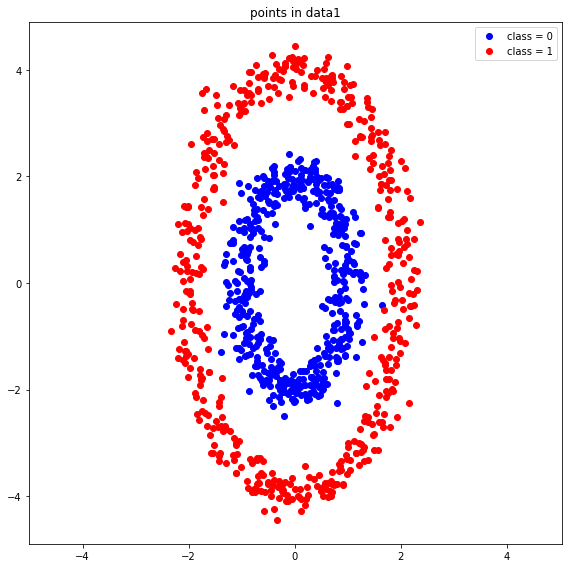

In [3]:
f = plt.figure(figsize=(8,8))   

plt.title('points in data1')
plt.plot(data1_point_x_class_0, data1_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data1_point_x_class_1, data1_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

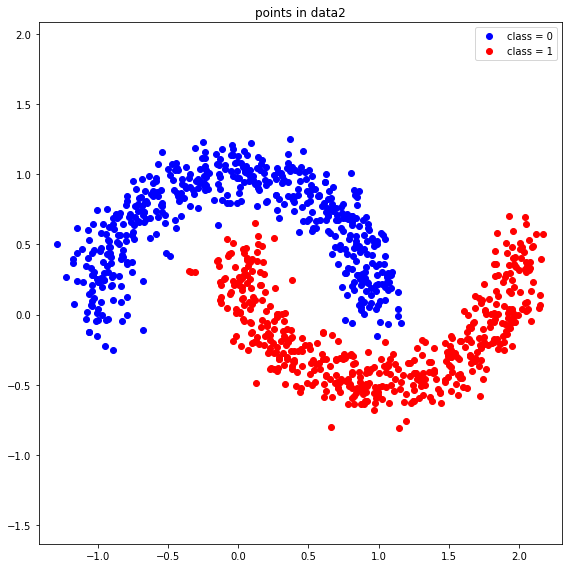

In [4]:
f = plt.figure(figsize=(8,8))   

plt.title('points in data2')
plt.plot(data2_point_x_class_0, data2_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data2_point_x_class_1, data2_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

## define the feature functions

- feature vector is defined by $(1, f_1(x, y), f_2(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [7]:
def compute_feature1(point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    ## 첫번재 데이터셋에 대한 classifier 정의를 위해 각 포인트에 대해 feature funtion정의
    ## input으로 첫번째 데이터 셋이 들어오고, 그의 feature함수 정의
    x = point[:, 0]
    y = point[:, 1]
    feature = np.array([pow(x, 0), pow(x, 2), pow(y, 2), x, y])
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return feature

a = compute_feature1(data1)
print(a)
print(a.shape)

[[ 1.          1.          1.         ...  1.          1.
   1.        ]
 [ 0.69154193  0.76031424  1.03905404 ...  4.08007681  5.29128808
   3.32792455]
 [ 0.11496168  0.05962387  0.05401441 ...  0.09852065  0.04892059
   0.02223976]
 [ 0.83159     0.87196     1.01934    ...  2.01992     2.30028
   1.82426   ]
 [-0.33906     0.24418     0.23241    ... -0.31388     0.22118
  -0.14913   ]]
(5, 1000)


In [10]:
def compute_feature2(point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # 두번째 데이터 셋이 input, 
    x = point[:, 0]
    y = point[:, 1]
    feature = np.array([pow(x, 0), pow(x, 3), pow(x, 2), x, y])

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return feature

a = compute_feature2(data2)
print(a.shape)

(5, 1000)


## define the linear regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature = $(1, f_1(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [12]:
def compute_linear_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    var_count = feature.shape[0]
    data_num = feature.shape[1]
    
    theta_vector = theta.reshape(1, var_count).T  
    # shape : var_count * 1 
    
    data_matrix = np.array([])
    for count in range(var_count):
        if count == 0:
            data_matrix = feature[count].reshape(1, data_num).T
        else:
            data_matrix = np.hstack((data_matrix, feature[count].reshape(1, data_num).T))
        # data_num * var_count shape
    
    value = np.dot(data_matrix, theta_vector)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value

## define sigmoid function with input

- $z \in \mathbb{R}$

In [14]:
def sigmoid(z):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    value = 1 / (1 + np.exp(-z))


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value 

## define the logistic regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$

In [15]:
def compute_logistic_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    regression_value = compute_linear_regression(theta, feature)
    value = sigmoid(regression_value)


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value

## define the residual function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [650]:
def compute_residual(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    logistic = compute_logistic_regression(theta, feature)
    residual = np.zeros(len(label))

    for i in range(len(label)):
      residual[i] = (-1)*label[i]*np.log(logistic[i]) - (1-label[i])*(np.log(1-logistic[i]))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return residual

## define the loss function for the logistic regression

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [651]:
def compute_loss(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    n = feature.shape[1]
    residual = compute_residual(theta, feature, label)
    loss = np.sum(residual) / n

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return loss

## define the gradient of the loss with respect to the model parameter $\theta$

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [652]:
def compute_gradient(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    label = label.flatten()
    data_num = feature.shape[1]
    print(data_num)
    n = len(label)
    logistic = compute_logistic_regression(theta,feature).T
    
    gradient = np.dot((logistic - label), feature) / n

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return gradient

## compute the accuracy of the prediction for point with a given model parameter

In [653]:
def compute_accuracy(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return accuracy

## initialize the gradient descent algorithm

In [654]:
data1_number_iteration   = 100
data2_number_iteration   = 100 

data1_learning_rate   = 0.1 
data2_learning_rate   = 0.1 

data1_number_feature    = 3
data2_number_feature    = 3 

theta1  = np.zeros(data1_number_feature)
theta2  = np.zeros(data2_number_feature)

data1_loss_iteration  = np.zeros(data1_number_iteration)
data2_loss_iteration  = np.zeros(data2_number_iteration)

data1_accuracy_iteration    = np.zeros(data1_number_iteration)
data2_accuracy_iteration    = np.zeros(data2_number_iteration)

## run the gradient descent algorithm to optimize the loss function with respect to the model parameter

In [655]:
for i in range(data1_number_iteration):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    theta1      = 
    loss1       =
    accuracy1   = 

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    data1_loss_iteration[i]     = loss1
    data1_accuracy_iteration[i] = accuracy1

data1_theta_optimal = theta1

In [656]:
for i in range(data2_number_iteration):
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    theta2      = 
    loss2       =
    accuracy2   = 

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    data2_loss_iteration[i]     = loss2
    data2_accuracy_iteration[i] = accuracy2

data2_theta_optimal = theta2

___

___

## functions for presenting the results

___

___

In [670]:
def function_result_01():

    print("final loss for data1 = {:13.10f}".format(data1_loss_iteration[-1]))

In [671]:
def function_result_02():

    print("final loss for data2 = {:13.10f}".format(data2_loss_iteration[-1]))

In [672]:
def function_result_03():

    print("final accuracy for data1 = {:13.10f}".format(data1_accuracy_iteration[-1]))

In [673]:
def function_result_04():

    print("final accuracy for data2 = {:13.10f}".format(data2_accuracy_iteration[-1]))

In [674]:
def function_result_05():
    
    plt.figure(figsize=(8,6))
    plt.title('loss for data1')

    plt.plot(data1_loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [675]:
def function_result_06():

    plt.figure(figsize=(8,6))
    plt.title('loss for data2')

    plt.plot(data2_loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [676]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('accuracy for data1')

    plt.plot(data1_accuracy_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

In [677]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('accuracy for data2')

    plt.plot(data2_accuracy_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

## plot the linear regression values over the 2-dimensional Euclidean space and superimpose the training data

In [678]:
def function_result_09():

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('linear regression values')
    
    min_x   = np.min(data1_point_x)
    max_x   = np.max(data1_point_x)
    min_y   = np.min(data1_point_y)
    max_y   = np.max(data1_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [679]:
def function_result_10():
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('linear regression values')
    
    min_x   = np.min(data2_point_x)
    max_x   = np.max(data2_point_x)
    min_y   = np.min(data2_point_y)
    max_y   = np.max(data2_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

## plot the logistic regression values over the 2-dimensional Euclidean space

In [680]:
def function_result_11():

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('logistic regression values')
    
    min_x   = np.min(data1_point_x)
    max_x   = np.max(data1_point_x)
    min_y   = np.min(data1_point_y)
    max_y   = np.max(data1_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [681]:
def function_result_12():
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('logistic regression values')

    min_x   = np.min(data2_point_x)
    max_x   = np.max(data2_point_x)
    min_y   = np.min(data2_point_y)
    max_y   = np.max(data2_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

___

___

## results

___

___

In [ ]:
number_result = 12

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)